In [21]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import t

In [13]:
def read_numbers_from_txt(file_path):
    """
    讀取一個 txt 檔案，每行一個數值，回傳 list。
    """
    numbers = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if line:  # 避免空行
                numbers.append(int(line) / 1000)  # 可改成 int(line) 若確定都是整數
    return np.array(numbers)
def plot_cumulative_counts(data_dict):
    """
    畫出每個類別的數量累加圖（累積總和）。
    data_dict: dict，key 是類別名稱，value 是數值 list。
    """
    plt.figure(figsize=(10, 6))
    
    for label, values in data_dict.items():
        cumulative_sum = []
        total = 0
        for v in values:
            total += v
            cumulative_sum.append(total)
        plt.plot(range(1, len(values)+1), cumulative_sum, label=label, linewidth=1.5, marker='o', markersize=1)

    plt.xlabel('N operation')
    plt.ylabel('times(ms)')
    plt.title('Time complexity of alloc and free')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [15]:
free_list = read_numbers_from_txt("free_list_old.txt")
malloc = read_numbers_from_txt("malloc.txt")
new_free_list = read_numbers_from_txt("free_list_new.txt")

In [17]:
perf = {
    "free_list": free_list,
    "malloc": malloc,
    "new_free_list": new_free_list
}

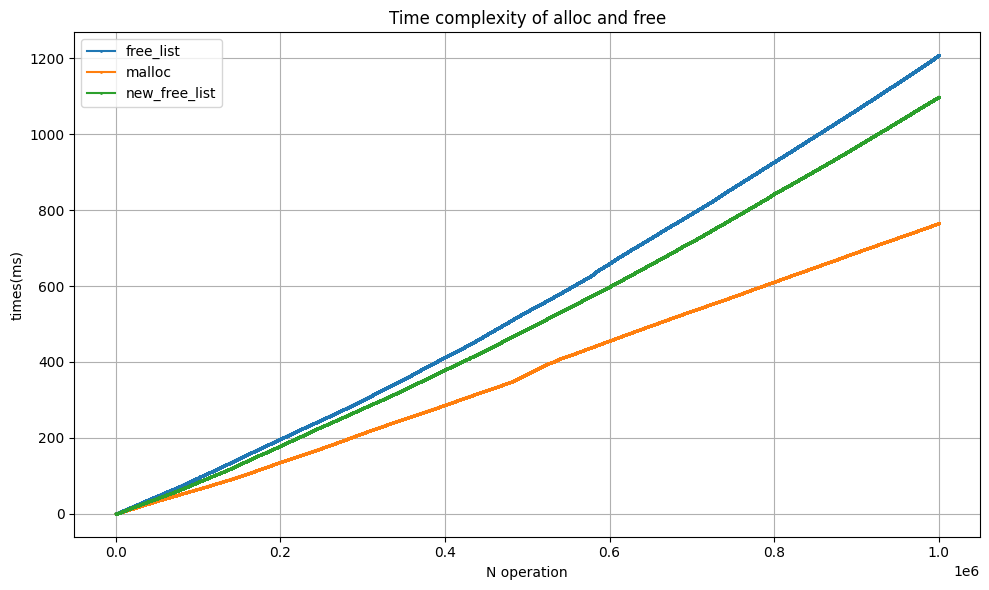

In [18]:
plot_cumulative_counts(perf)

In [19]:
def calculate_t_value(arr1, arr2):
    n = len(arr1)
    x1 = np.mean(arr1)
    x2 = np.mean(arr2)
    sp1 = np.std(arr1, ddof=1)  # 使用樣本標準差
    sp2 = np.std(arr2, ddof=1)

    denominator = np.sqrt((sp1**2 + sp2**2) / n)
    t_value = (x1 - x2) / denominator

    return t_value

In [27]:


t_value = calculate_t_value(free_list, new_free_list)
df = 2 * len(free_list) - 2  # 自由度
p = t.cdf(t_value, df)

print(f"t_value: {t_value}, 自由度: {df}, p_value: {p}")
print(f"效能增加:{free_list.sum() / new_free_list.sum()}")


t_value: 54.842672772670426, 自由度: 1999998, p_value: 1.0
效能增加:1.0997125008421051
